In [4]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import httpcore
setattr(httpcore, 'SyncHTTPTransport', 'AsyncHTTPProxy')

In [6]:
from gtts import gTTS
from googletrans import Translator, LANGUAGES

valid_target_languages = [
    'en', 'hi', 'ur', 'pa', 'gu', 'mr', 'te', 'kn',
    'ml', 'ta',  'bn', 'as', 'ma'
]

def translate_text(text, target_language):
    translator = Translator()
    translated_text = translator.translate(text, dest=target_language)
    return translated_text.text

def main(input_text,target_language):
    

    # Get user input

    # Translate the text
    translated_text = translate_text(input_text, target_language)

    print(f"Translated text in {LANGUAGES[target_language]}:")
    print(translated_text)
    tts = gTTS(translated_text, lang=target_language)  # Specify the target language code (e.g., 'fr' for French)
    tts.save('output.mp3')
    return 'output.mp3'
# Display available languages for translation
print("Available languages for translation:")
for code, lang in LANGUAGES.items():
    if code in valid_target_languages:
        print(f"{code}: {lang}")

input_text = input("Enter the text you want to translate: ")

target_language = input("Enter the language code for translation: ")


main(input_text,target_language)


Available languages for translation:
bn: bengali
en: english
gu: gujarati
hi: hindi
kn: kannada
ml: malayalam
mr: marathi
pa: punjabi
ta: tamil
te: telugu
ur: urdu
Enter the text you want to translate: floods in kerala
Enter the language code for translation: te
Translated text in telugu:
కేరళలో వరదలు


'output.mp3'

In [7]:
from IPython.display import Audio
Audio("output.mp3")

In [8]:
translated_text1= translate_text(input_text,'en')
print(translated_text1)

floods in kerala


In [11]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install keybert --upgrade

In [11]:
!pip install tensorflow==2.4.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.0


In [12]:
from keybert import KeyBERT
def extract_key_phrases(input_text):



    model = KeyBERT()
    key_phrases = model.extract_keywords(input_text, keyphrase_ngram_range=(1, 1), stop_words='english')
    key_phrases = [phrase[0] for phrase in key_phrases]

    return key_phrases
phr=extract_key_phrases(translated_text1)
print(phr)

['floods', 'kerala']


In [13]:
from icrawler.builtin import GoogleImageCrawler
for keyword in phr:

  output_directory = f'images_{keyword}'

  google_crawler = GoogleImageCrawler(storage={'root_dir': output_directory})


  google_crawler.crawl(keyword=keyword, max_num=2)
  

2024-05-18 13:11:05,818 - INFO - icrawler.crawler - start crawling...
2024-05-18 13:11:05,818 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-05-18 13:11:05,834 - INFO - feeder - thread feeder-001 exit
2024-05-18 13:11:05,858 - INFO - icrawler.crawler - starting 1 parser threads...
2024-05-18 13:11:05,858 - INFO - icrawler.crawler - starting 1 downloader threads...
2024-05-18 13:11:07,907 - INFO - parser - parsing result page https://www.google.com/search?q=floods&ijn=0&start=0&tbs=&tbm=isch
Exception in thread parser-001:
Traceback (most recent call last):
  File "C:\Users\kumar\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\kumar\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\kumar\anaconda3\lib\site-packages\icrawler\parser.py", line 94, in worker_exec
    for task in self.parse(response, **kwargs):
TypeError: 'NoneType' object is not iterable
2024-05-18 13:11:10,8

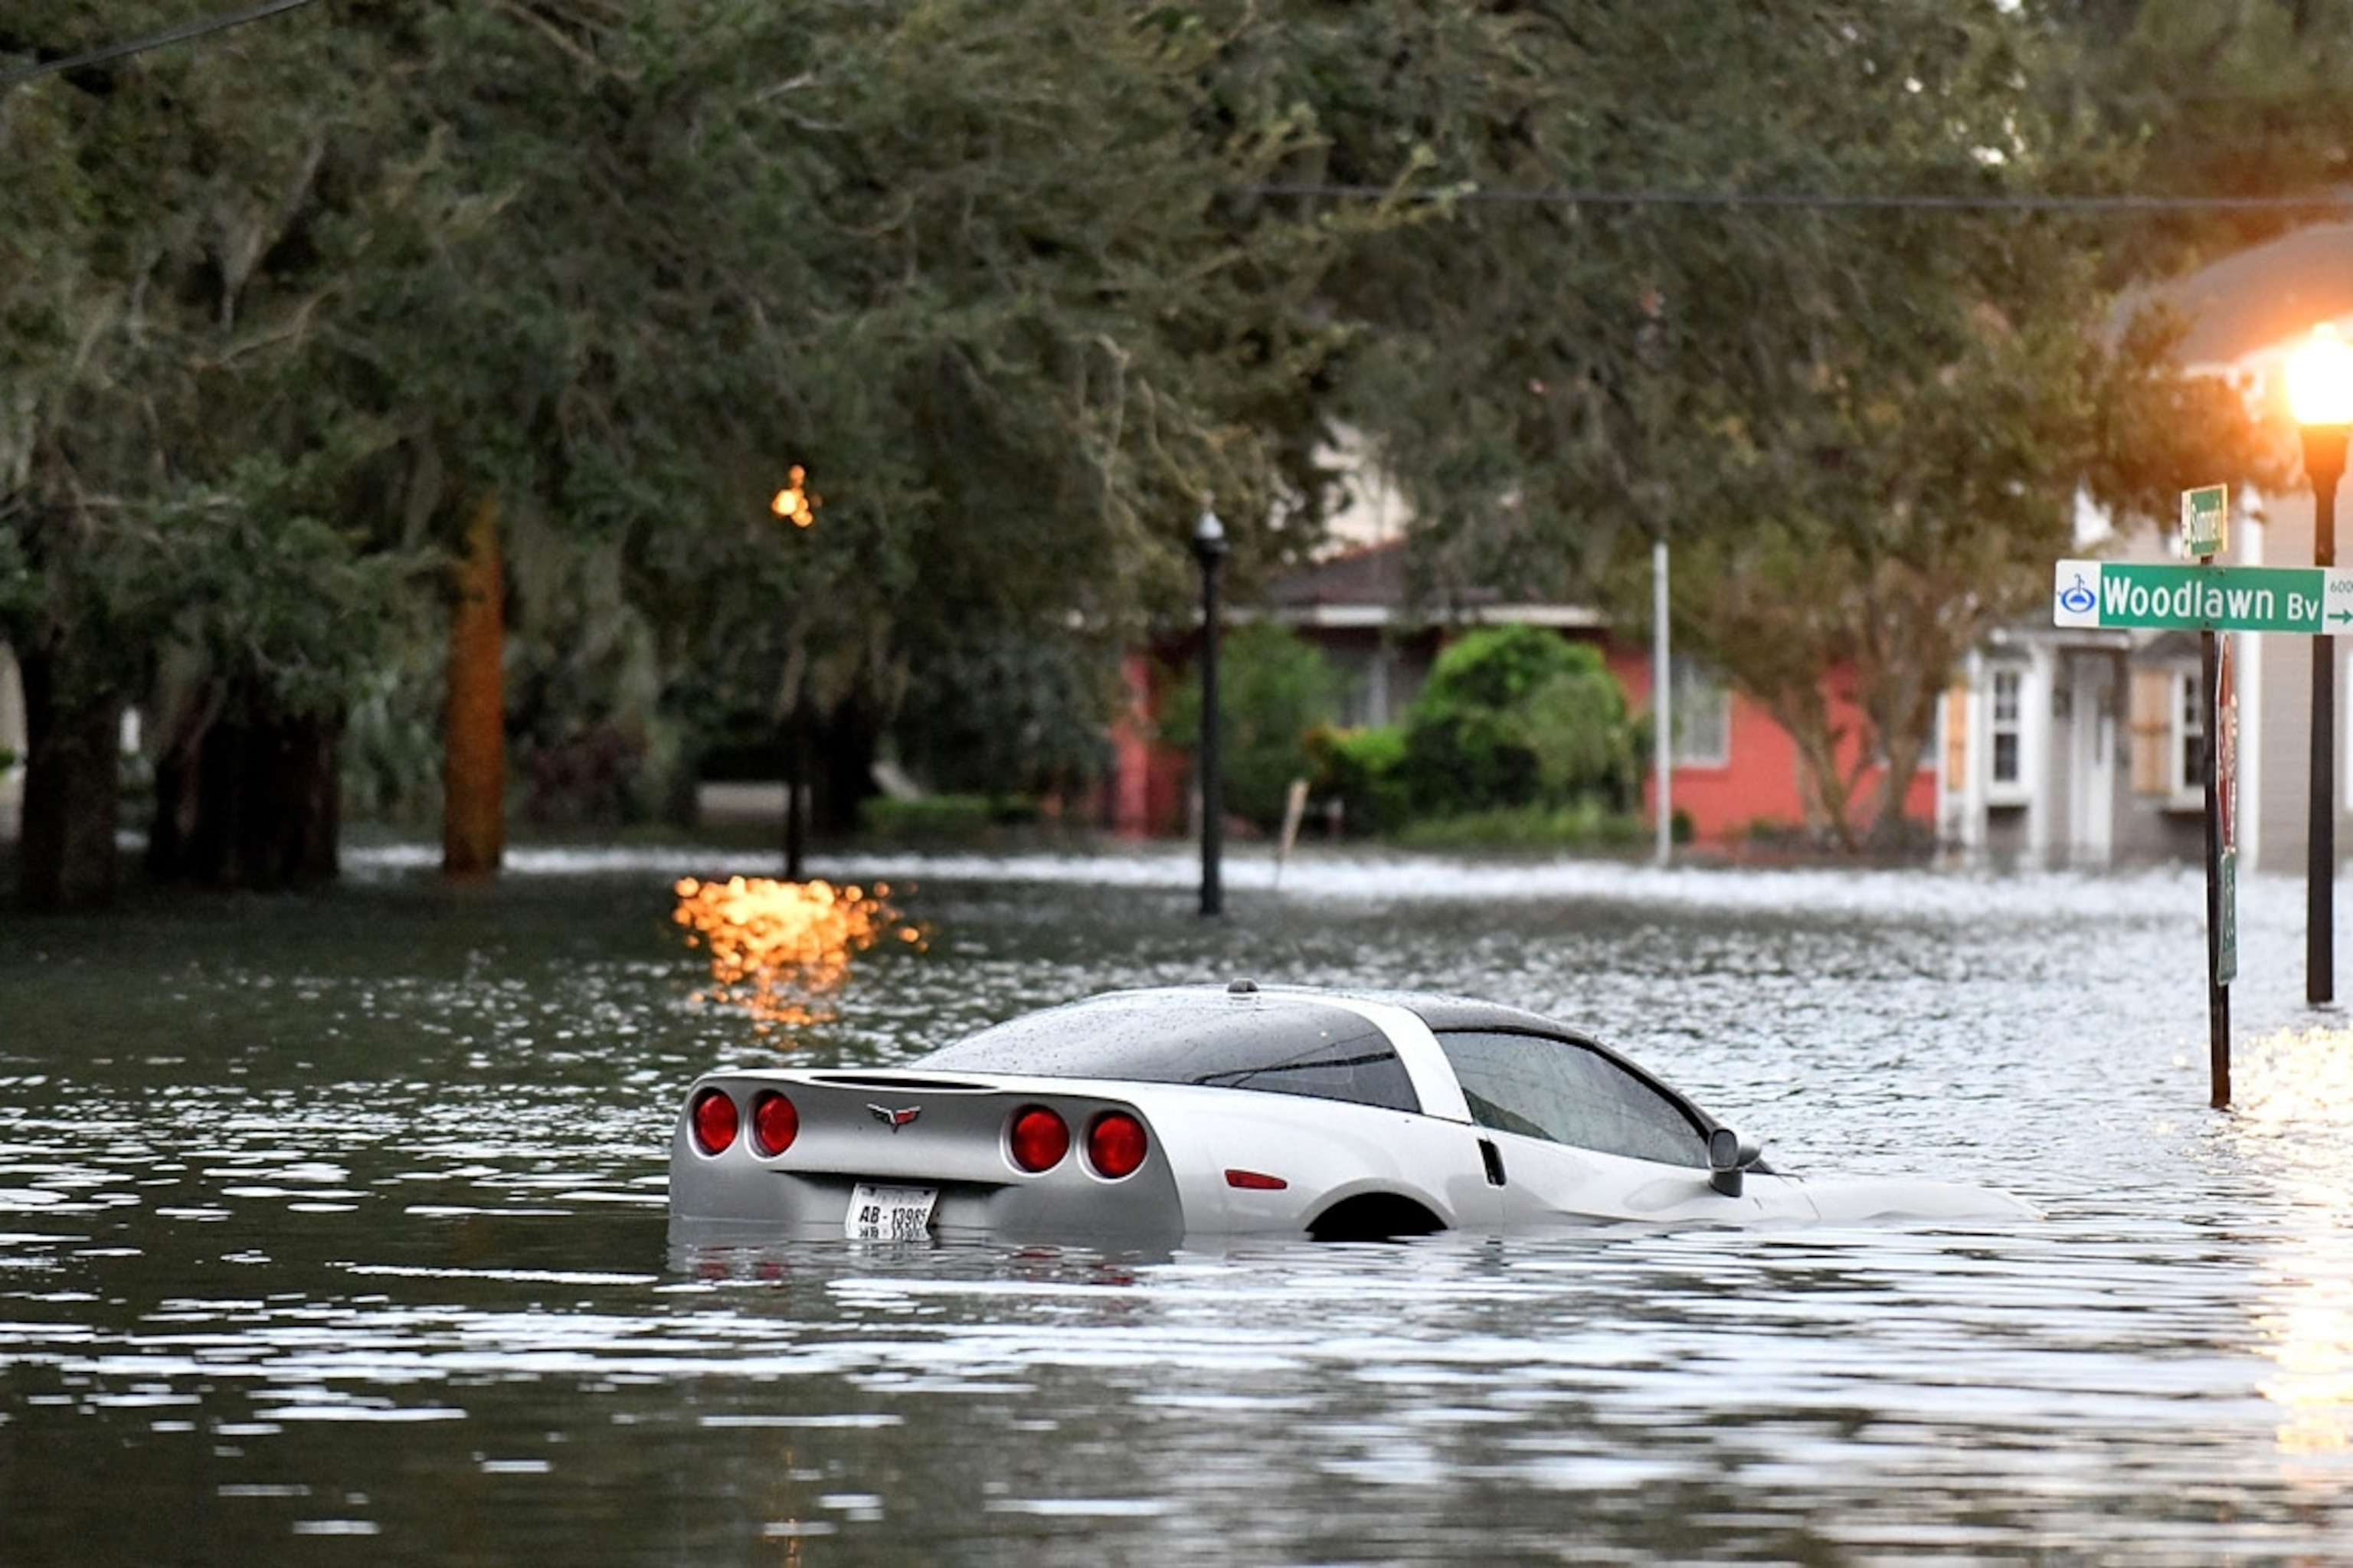

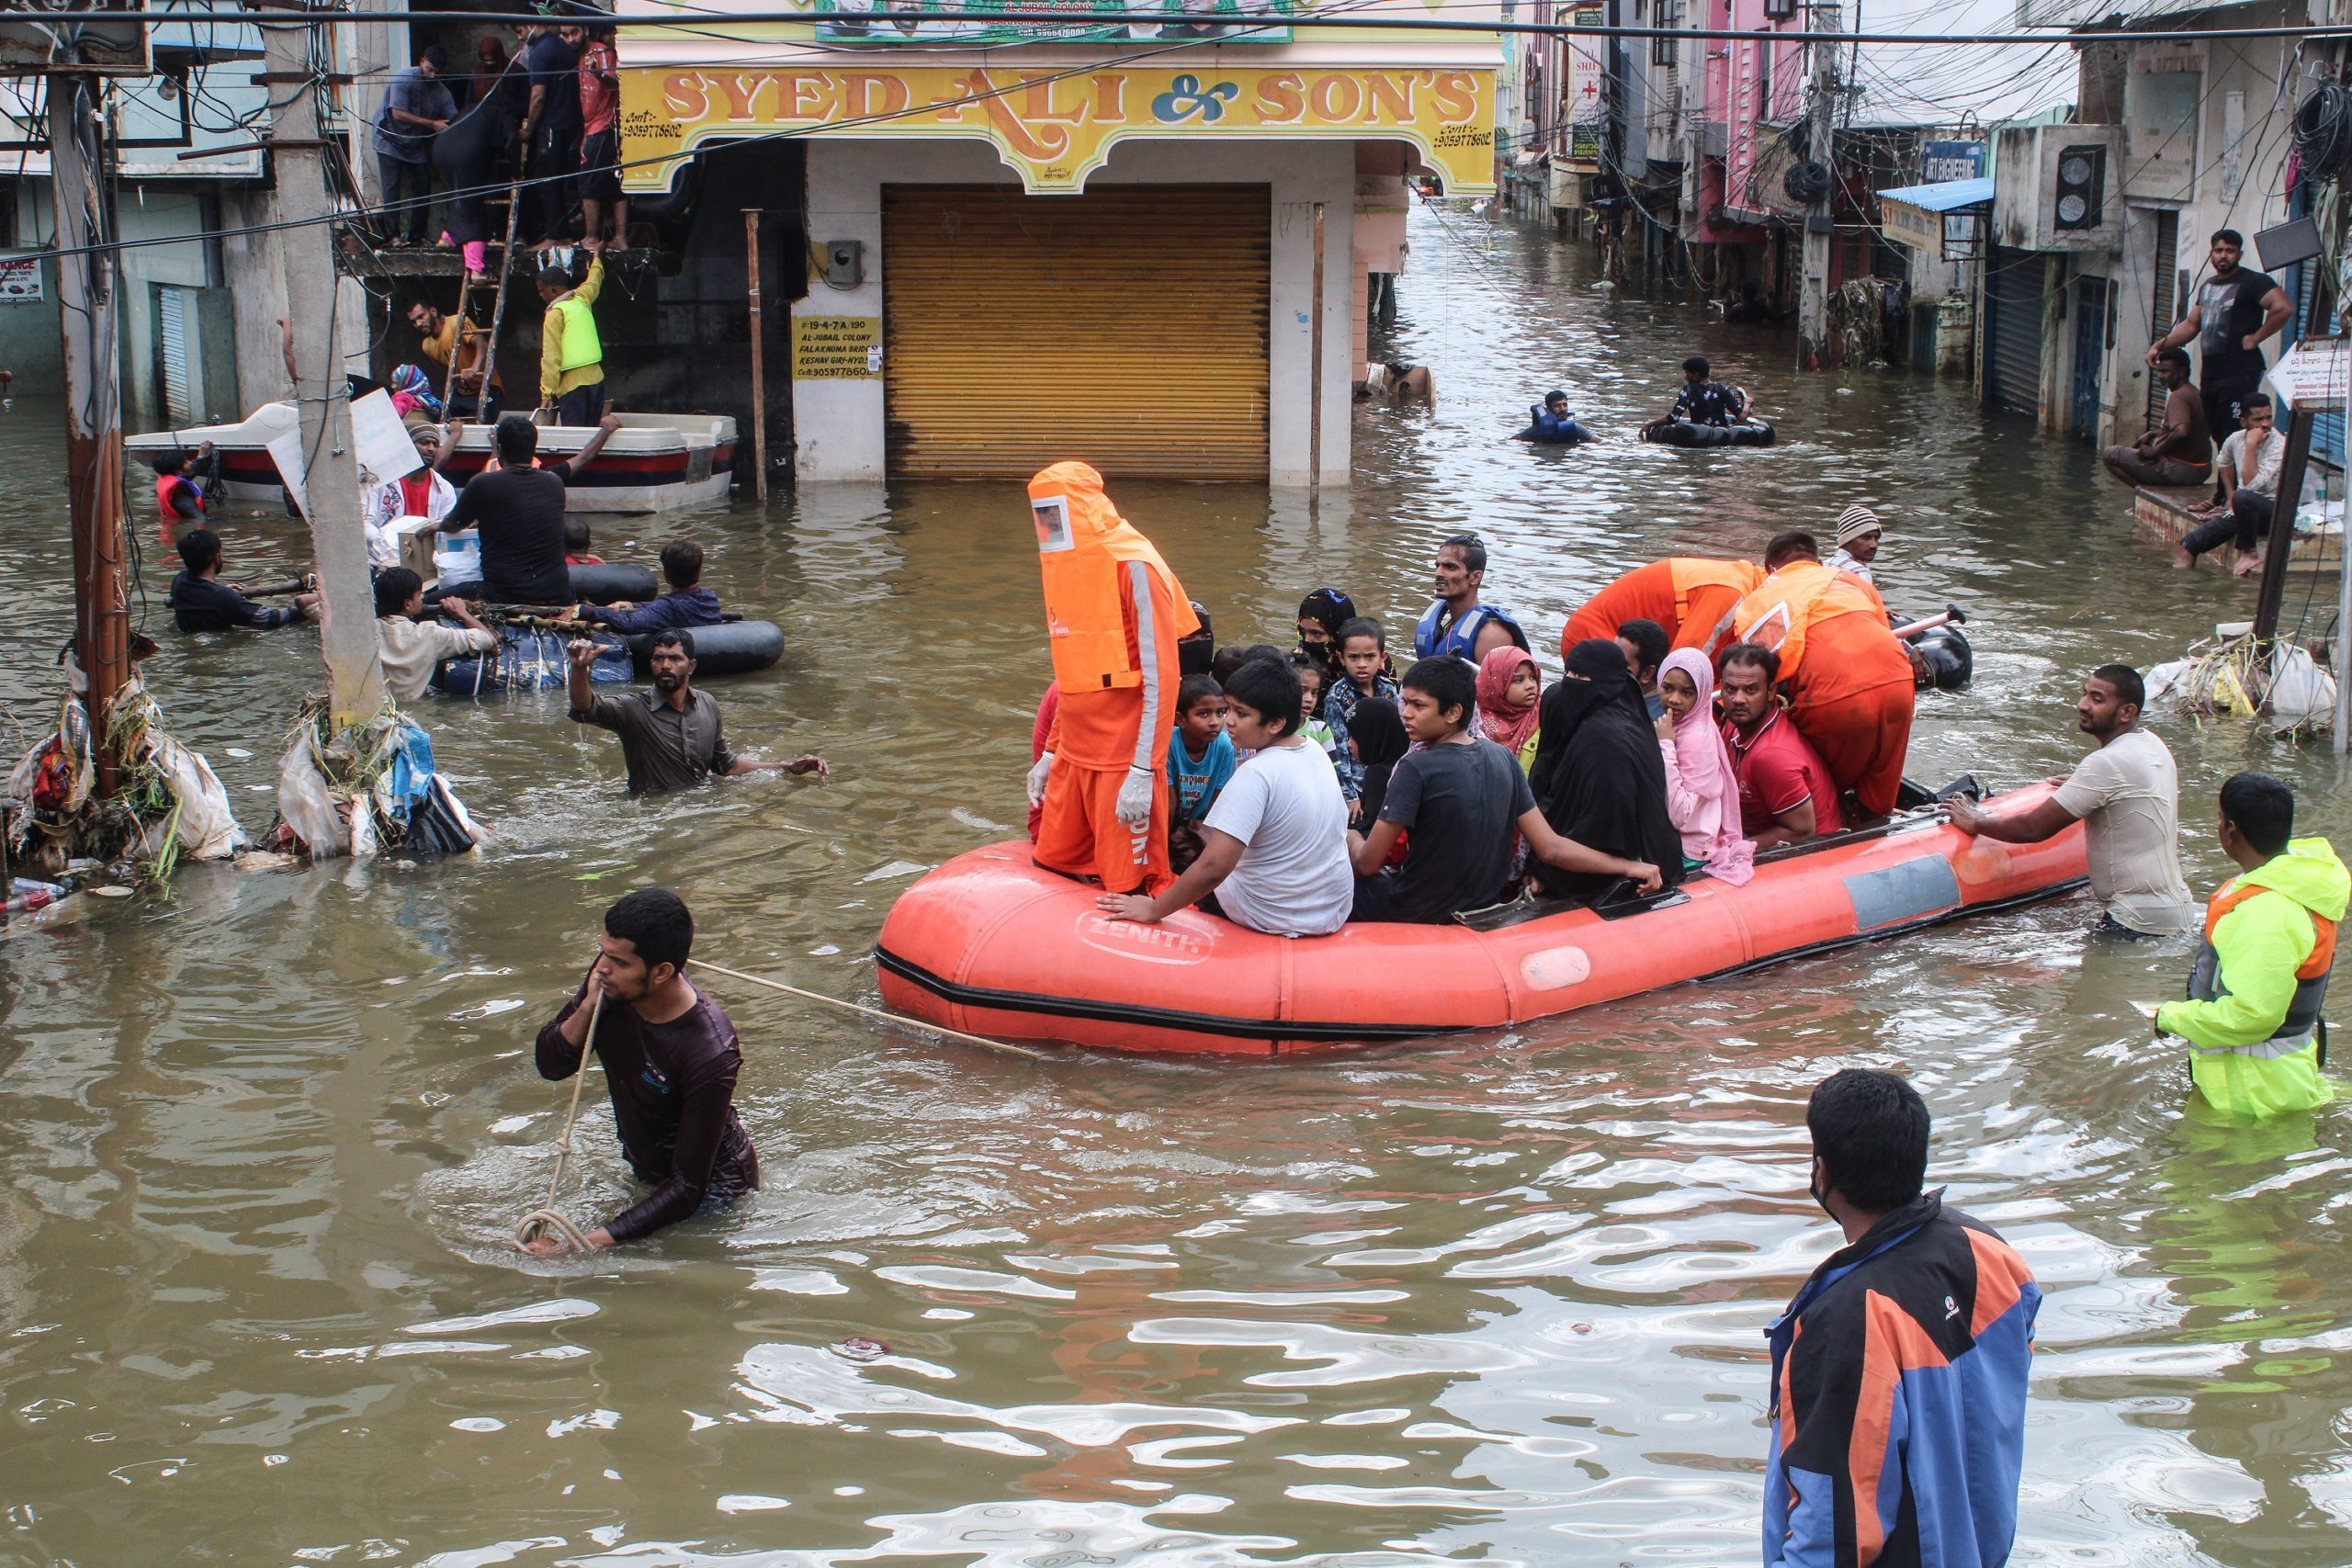

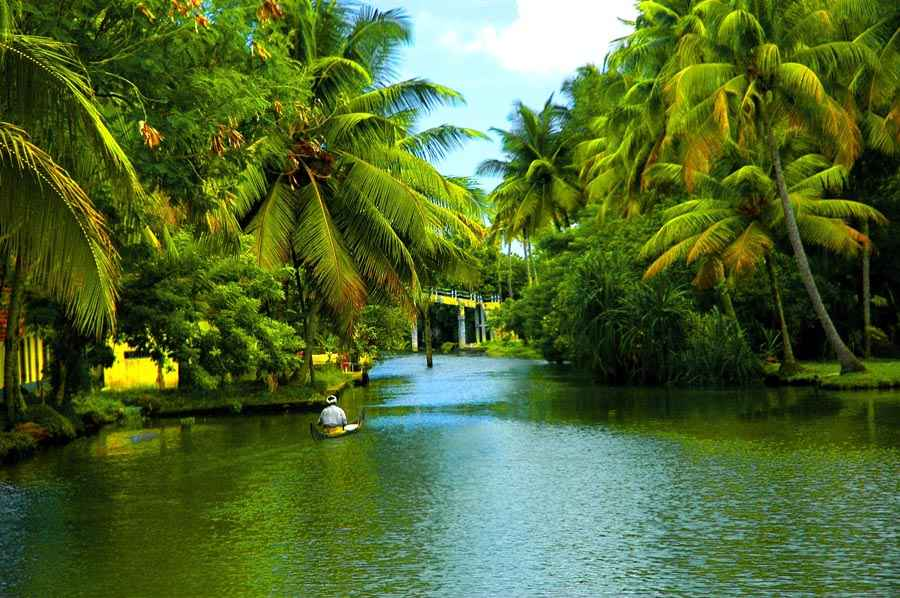

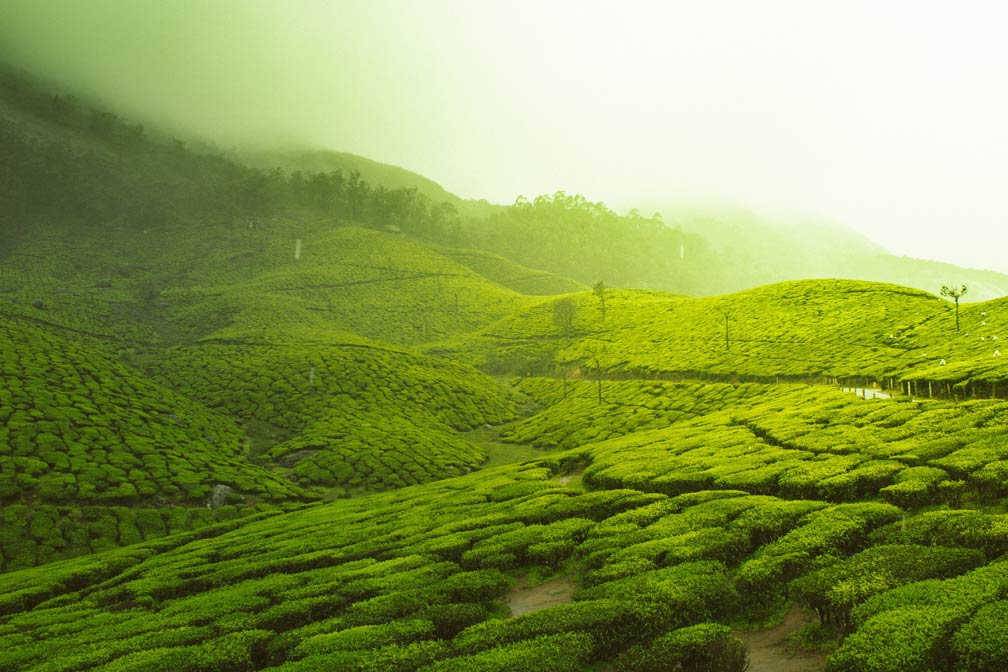

In [14]:
from IPython.display import Image, display
import os

for keyword in phr:
    output_directory = f'images_{keyword}'

    for i in range(1, 3):  # Assuming you downloaded 2 images
        for extension in ['jpg', 'jpeg', 'png', 'gif', 'bmp', 'tiff']:
            image_path = f'{output_directory}/00000{i}.{extension}'  # Modify the path as needed
            if os.path.exists(image_path):
                display(Image(filename=image_path))
                break


In [15]:
from moviepy.editor import *
import os
clips = []
for keyword in phr:
    image_folder = f'images_{keyword}'  # Your image folder path
    output_path = 'video-output.mp4'
    fps = 24  # Frames per second

    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))])

    

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        clip = ImageClip(image_path).set_duration(2)  # Set the duration for each image
        clips.append(clip)

video_clip = concatenate_videoclips(clips, method='compose')
video_clip.write_videofile(output_path, fps=fps, remove_temp=True, codec="libx264", audio_codec="aac")


Moviepy - Building video video-output.mp4.
Moviepy - Writing video video-output.mp4



Moviepy - Done !
Moviepy - video ready video-output.mp4


In [16]:
from IPython.display import Video
from IPython.display import HTML

output_path = "video-output.mp4"
video_tag = f'<video width="640" height="480" controls><source src="{output_path}" type="video/mp4"></video>'
HTML(video_tag)